In [1]:
# Use if you run the notebook on Google colab
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 10.2 MB/s eta 0:00:00


# 9: Hierarchical Clustering

## Imports

In [3]:
import os
import random
import sys

import numpy as np
import pandas as pd

sys.path.append("/content/drive/MyDrive/50603/code")
os.chdir('/content/drive/MyDrive/50603')
from plotting_functions import *
from plotting_functions_unsup import *
import matplotlib.pyplot as plt
import mglearn
import seaborn as sns
from ipywidgets import interactive
from plotting_functions import *
from plotting_functions_unsup import *
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn import cluster, datasets, metrics
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.datasets import make_blobs, make_moons
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

plt.style.use("seaborn-v0_8")

plt.rcParams["font.size"] = 16
%matplotlib inline
pd.set_option("display.max_colwidth", 0)

<br><br>

## Hierarchical clustering [[video]()]

### Motivation

- Deciding how many clusters we want is a hard problem.
- Often, it's useful to get a complete picture of similarity between points in our data before picking the number of clusters.  
- Hierarchical clustering is helpful in these scenarios.  

### Main idea

1. Start with each point in its own cluster.
2. Greedily merge most similar *clusters*.
3. Repeat Step 2 until you obtain only one cluster ($n-1$ times).

### Visualizing hierarchical clustering

- Hierarchical clustering can be visualized using a tool called **a dendrogram**.
- Unfortunately, `sklearn` cannot do it so we will use the package `scipy.cluster.hierarchy` for hierarchical clustering.

### Hierarchical clustering input and output

In [4]:
X, y = make_blobs(random_state=0, n_samples=11)

In [5]:
from scipy.cluster.hierarchy import ward

linkage_array = ward(X)

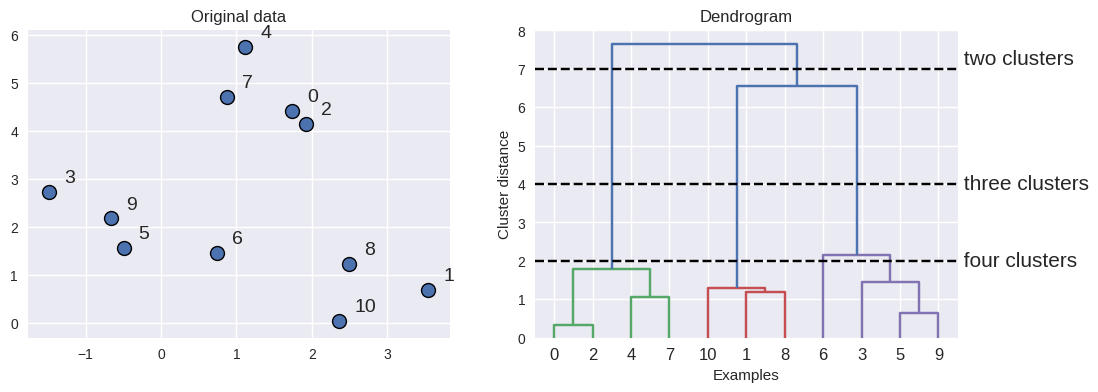

In [6]:
plot_X_dendrogram(X, linkage_array, label_n_clusters=True)

- Every point goes through the journey of being on its own (its own cluster) and getting merged with some other bigger clusters.
- The intermediate steps in the process provide us clustering with different number of clusters.

### Dendrogram

- Dendrogram is a tree-like plot.
- On the x-axis we have data points.
- On the y-axis we have distances between clusters.
- We start with data points as leaves of the tree.  
- New parent node is created for every two clusters that are joined.
- The length of each branch shows how far the merged clusters go.
    - In the dendrogram above going from three clusters to two clusters means merging far apart points because the branches between three cluster to two clusters are long.

### How to plot a dendrogram?

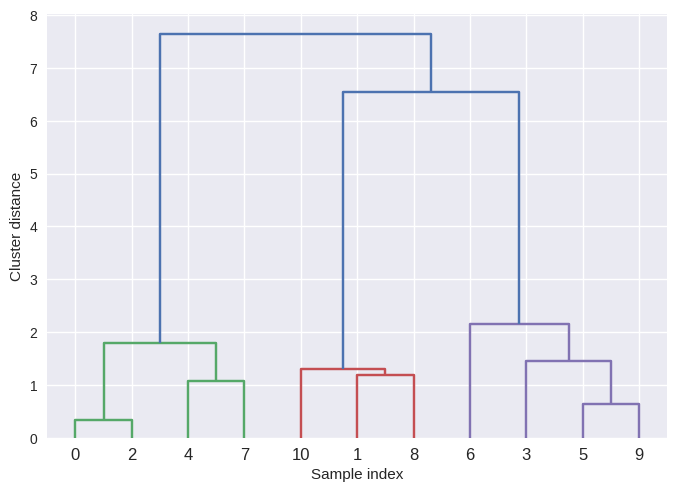

In [7]:
from scipy.cluster.hierarchy import dendrogram

ax = plt.gca()
dendrogram(linkage_array, ax=ax)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance");

### What do we mean by distance between clusters?

- We know how to measure distance between points (e.g., using Euclidean distance).
- How do we measure distances between clusters?
- The **linkage criteria** determines how to find similarity between clusters:
    - Some example linkage criteria are:
        - single linkage (minimum distance)
        - average linkage (average distance)
        - complete (or maximum) linkage (maximum distance)
        - ward linkage    

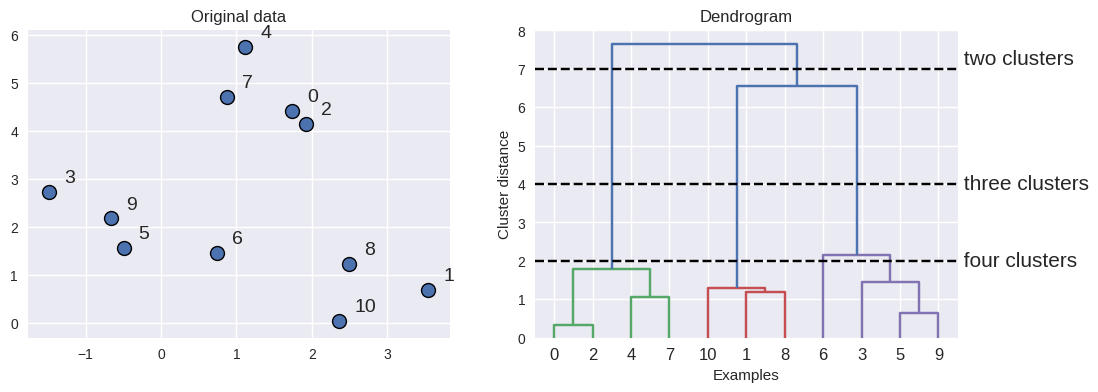

In [8]:
plot_X_dendrogram(X, linkage_array, label_n_clusters=True)

### `single` linkage

- Merges two clusters that have the **smallest minimum distance** between all their points.
- Let's use `scipy.cluster.hierarchy`'s `single` to get linkage information.
- This method gives us matrix `Z` with the merging information.

In [9]:
from scipy.cluster.hierarchy import (
    average,
    complete,
    dendrogram,
    fcluster,
    single,
    ward,
)

Z = single(X)
columns = ["c1", "c2", "distance(c1, c2)", "# observations"]

In [10]:
pd.DataFrame(Z, columns=columns)

,c1,c2,"distance(c1, c2)",# observations
0,0.0,2.0,0.332095,2.0
1,5.0,9.0,0.645802,2.0
2,7.0,11.0,0.911272,3.0
3,3.0,12.0,0.989059,3.0
4,4.0,13.0,1.072565,4.0
5,1.0,8.0,1.180379,2.0
6,10.0,16.0,1.194950,3.0
7,6.0,14.0,1.243674,4.0
8,17.0,18.0,1.771561,7.0
9,15.0,19.0,2.937847,11.0


- The linkage returns a matrix `Z` of shape `n-1` (number of iterations) by 4:
- The **rows represent iterations**.
- First and second columns (c1 and c2 above): **indexes of the clusters** being merged.
- Third column (distance(c1, c2)): the **distance between the clusters** being merged.
- Fourth column (# observations): the number of **examples in the newly formed cluster**.

### Creating dendrogram with `single` linkage

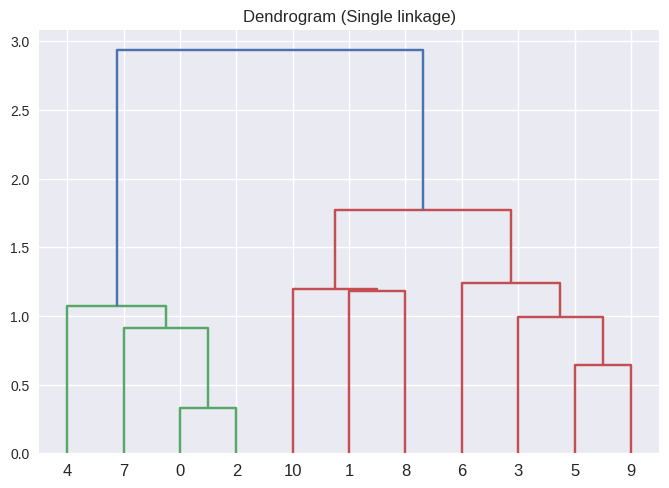

In [11]:
dendrogram(Z)
# Z is our single linkage matrix
plt.title("Dendrogram (Single linkage)");

### `average` linkage

- Merges two clusters that have the **smallest average distance** between all their points.
- `scipy.cluster.hierarchy`'s `average` method gives us matrix `Z` with the merging information using average linkage.   

In [12]:
Z = average(X)

In [13]:
pd.DataFrame(Z, columns=columns)

,c1,c2,"distance(c1, c2)",# observations
0,0.0,2.0,0.332095,2.0
1,5.0,9.0,0.645802,2.0
2,7.0,11.0,1.052555,3.0
3,1.0,8.0,1.180379,2.0
4,3.0,12.0,1.262342,3.0
5,10.0,14.0,1.271253,3.0
6,4.0,13.0,1.445888,4.0
7,6.0,15.0,1.792942,4.0
8,17.0,18.0,3.543287,8.0
9,16.0,19.0,3.985237,11.0


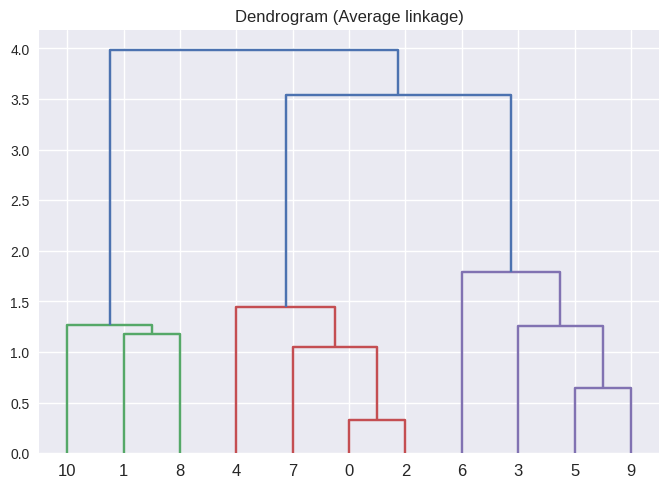

In [14]:
dendrogram(Z)
# Dendrogram with average linkage
plt.title("Dendrogram (Average linkage)");

### `complete` linkage

- Merges two clusters that have the **smallest maximum distance** between their points.

In [15]:
Z = complete(X)

In [16]:
pd.DataFrame(Z, columns=columns)

,c1,c2,"distance(c1, c2)",# observations
0,0.0,2.0,0.332095,2.0
1,5.0,9.0,0.645802,2.0
2,4.0,7.0,1.072565,2.0
3,1.0,8.0,1.180379,2.0
4,10.0,14.0,1.347556,3.0
5,3.0,12.0,1.535625,3.0
6,11.0,13.0,1.796596,4.0
7,6.0,16.0,2.559670,4.0
8,17.0,18.0,4.507219,8.0
9,15.0,19.0,5.849187,11.0


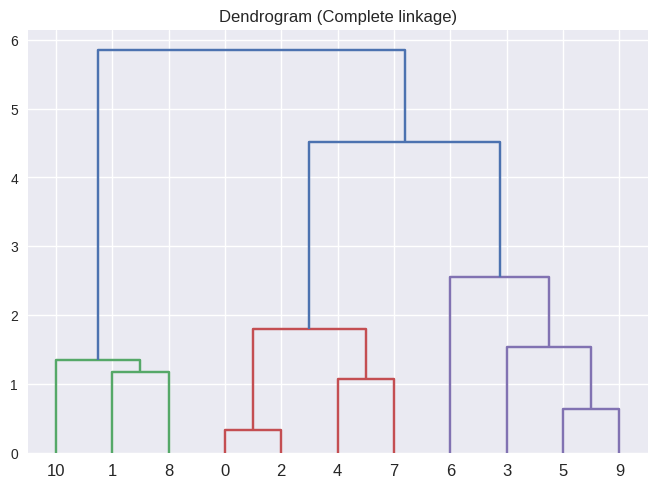

In [17]:
dendrogram(Z)
# Dendrogram with complete linkage
plt.title("Dendrogram (Complete linkage)");

### `ward` linkage

- Picks two clusters to merge such that the **variance within all clusters increases the least**.
- Often leads to equally sized clusters.

***Side Note***
> In simple terms, variance within a cluster measures how much the data points in the cluster deviate from the average or central point of the cluster. Lower variance indicates that the data points within the cluster are closer to each other, indicating higher cohesion or similarity, while higher variance suggests greater dispersion or heterogeneity within the cluster.

In [18]:
Z = ward(X)

In [19]:
pd.DataFrame(Z, columns=columns)

,c1,c2,"distance(c1, c2)",# observations
0,0.0,2.0,0.332095,2.0
1,5.0,9.0,0.645802,2.0
2,4.0,7.0,1.072565,2.0
3,1.0,8.0,1.180379,2.0
4,10.0,14.0,1.303116,3.0
5,3.0,12.0,1.444034,3.0
6,11.0,13.0,1.785951,4.0
7,6.0,16.0,2.159819,4.0
8,15.0,18.0,6.550249,7.0
9,17.0,19.0,7.636630,11.0


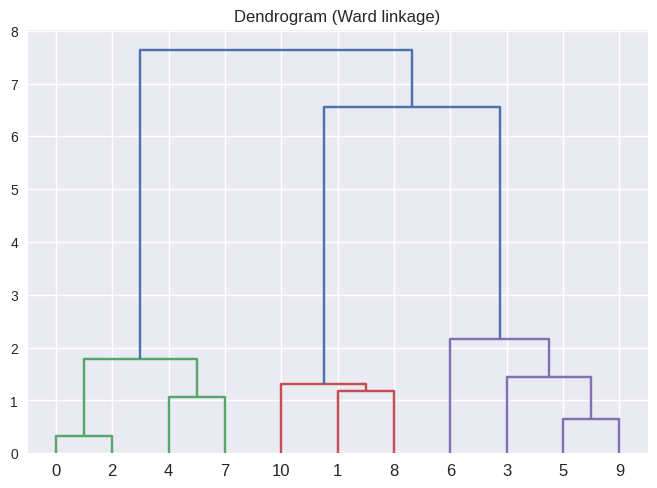

In [20]:
dendrogram(Z)
# Dendrogram with ward linkage
plt.title("Dendrogram (Ward linkage)");

<br><br>

### Hierarchical clustering on UN Subvotes dataset

- Let's use a dataset of votes on UN resolutions
- There is one row for each country and for each roll call vote.
- `rcid` column: the ID for a roll call vote, which is a formal voting procedure in which each member state's representative declares their vote individually.
- `vote` column values represent "yes", "abstain", "no"

In [21]:
votes_df = pd.read_csv("data/subvotes.csv")
votes_df

,rcid,country,vote
0,2491,USA,1
1,2491,Canada,1
2,2491,Bahamas,1
3,2491,Cuba,3
4,2491,Jamaica,1
...,...,...,...
27828,5358,New Zealand,1
27829,5383,New Zealand,3
27830,5364,New Zealand,2
27831,5367,New Zealand,1


In [22]:
votes_df['rcid'].value_counts()

,count
rcid,
5363,77
5367,77
5313,77
5364,77
5333,77
...,...
3966,69
3200,68
4110,66


In [23]:
votes = votes_df.pivot(index="country", columns="rcid")
votes = votes[np.sum(np.isnan(votes), axis=1) < 1]
print(votes.shape)
votes.head()

(17, 368)


vote                                               ...            \
rcid      2491 2492 2497 2504 2510 2526 2563 2610 2641 2645  ... 5321 5333   
country                                                      ...             
Australia  1.0  2.0  1.0  3.0  3.0  3.0  1.0  1.0  1.0  1.0  ...  1.0  1.0   
Austria    1.0  1.0  1.0  2.0  2.0  2.0  1.0  1.0  1.0  1.0  ...  1.0  1.0   
Brazil     1.0  1.0  1.0  1.0  1.0  2.0  2.0  3.0  1.0  1.0  ...  1.0  1.0   
Colombia   1.0  1.0  1.0  1.0  1.0  2.0  1.0  2.0  1.0  1.0  ...  1.0  1.0   
Denmark    1.0  1.0  1.0  2.0  2.0  3.0  1.0  1.0  1.0  1.0  ...  1.0  1.0   

                                                   
rcid      5337 5358 5363 5364 5365 5367 5383 5385  
country                                            
Australia  1.0  1.0  2.0  1.0  3.0  1.0  3.0  3.0  
Austria    1.0  1.0  2.0  2.0  2.0  1.0  3.0  3.0  
Brazil     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
Colombia   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
Denmark    1.0  1.0  2.0  2.0  2.0  1.0  3.0  3.0  

[5 rows x 368 columns]

- We have 17 countries and 368 votes.
- Let's cluster countries based on how they vote.

- We'll use [hamming distance](https://en.wikipedia.org/wiki/Hamming_distance) here because we are interested in knowing whether the countries agreed or disagreed on resolutions.
  - Hamming distance here means the number of votes are different between two countries.

In [24]:
def plot_dendrogram(method="average", metric="hamming", w=22, h=12):
    Z = linkage(votes, method=method, metric=metric)
    fig, ax = plt.subplots(figsize=(w, h))
    dendrogram(Z, labels=votes.index, ax=ax)
    ax = plt.gca()
    ax.set_ylabel("Distance", fontsize=w)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=80, fontsize=w)

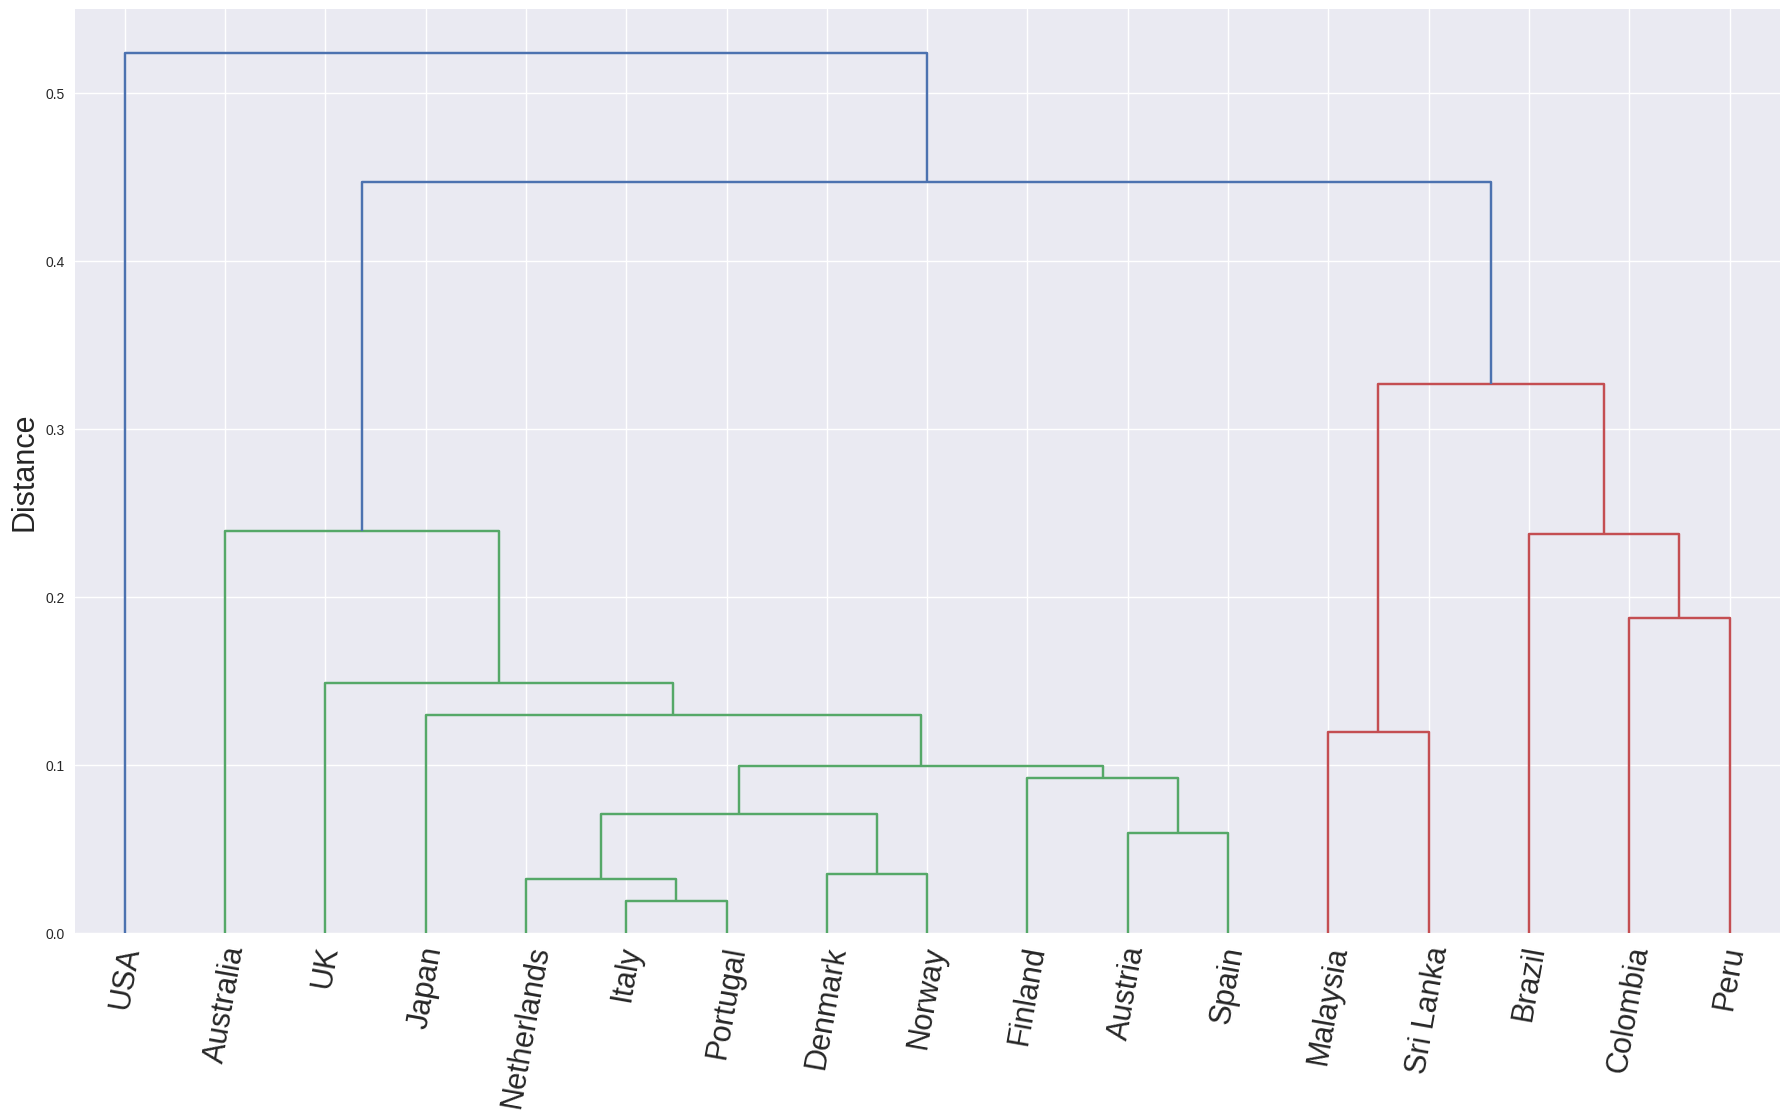

In [25]:
plot_dendrogram()

<br><br>